<h2>FAKE NEWS DETECTION

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim 
from gensim.models import Word2Vec
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf


In [2]:
#Loading the datasets containing the fake and true news
fake = pd.read_csv('/content/FAKETT.csv')
true = pd.read_csv('/content/TRUETT.csv')

In [3]:
#Displaying the first few rows of the fake datasframe
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
#Displaying the first few rows of the true dataframe
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Displaying all the columns which the fake dataset contains
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
#Displaying all the columns which the true dataset contains
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
#Displaying the number of news of each topic in the dataset
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [8]:
#Counting the occurrences of each unique value in the 'subject' column of the 'true' dataframe
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

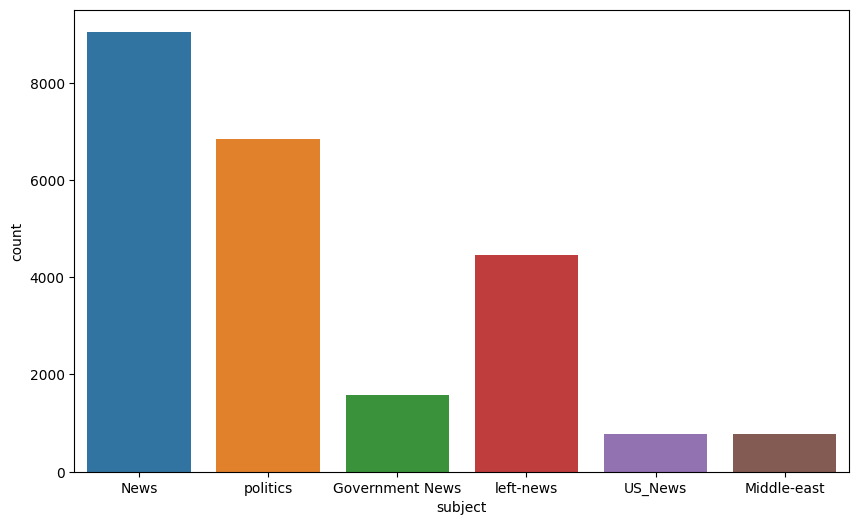

In [9]:
#Graph representation of the above information
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

<Axes: xlabel='subject', ylabel='count'>

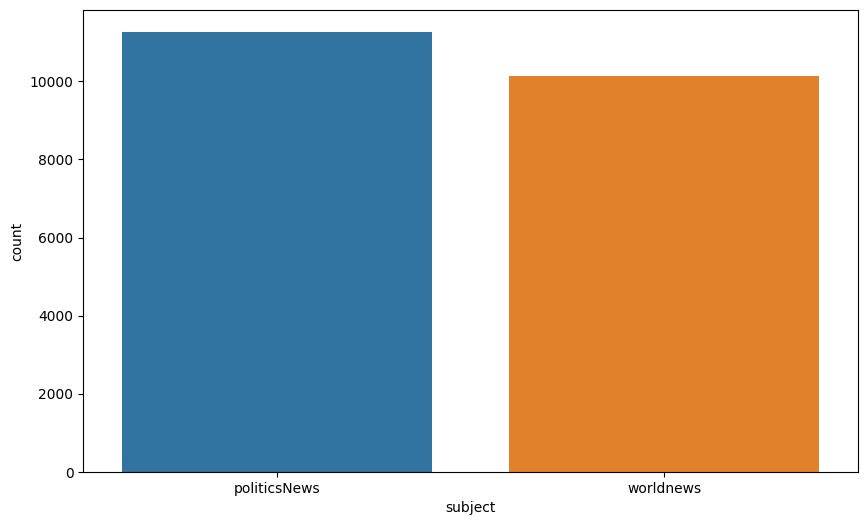

In [10]:
#Graph representation of the above information
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=true)

In [11]:
#Appending the content in the text column of the fake dataset to a variable
text = ' '.join(fake['text'].tolist())

In [12]:
#Appending the content in the text column of the true dataset to the same variable
text = ' '.join(true['text'].tolist())

<h3>WORDCLOUD 

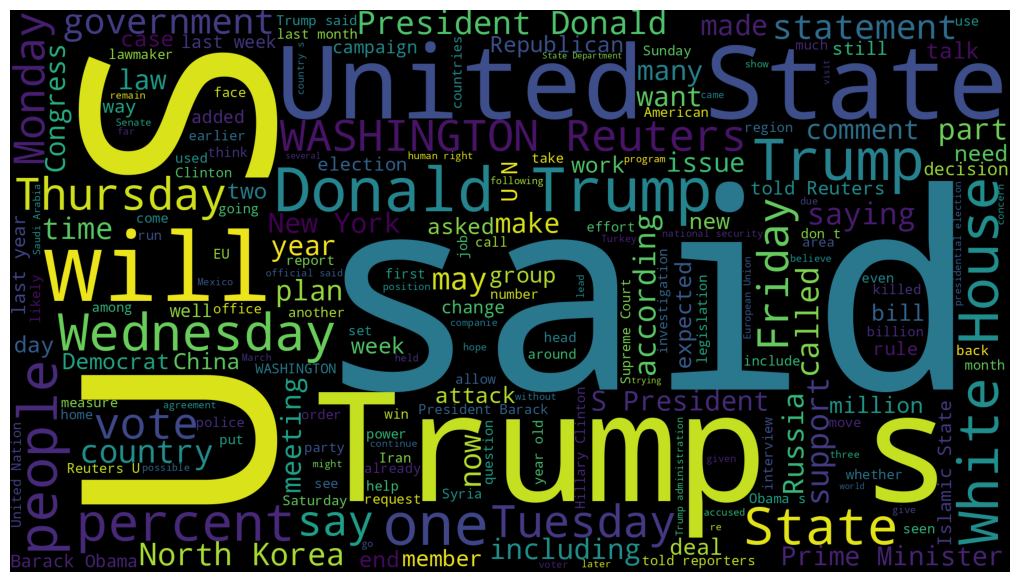

In [ ]:
#WordCloud plotting to understand the frequency of the words in the dataset
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
#Dropping the empty column
true.iloc[8970]
true = true.drop(8970, axis=0)

In [ ]:
true.shape

(21416, 4)

In [14]:
#empty_fake_index list that stores the indices of empty or blank texts in the 'fake' dataframe.
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [15]:
#Combining the title and text of each row into a single string, separated by a space, and assigned to the 'text' column.

true['text'] = true['title'].str.cat(true['text'], sep=' ')
fake['text'] = fake['title'].str.cat(fake['text'], sep=' ')

In [16]:
#We convert all the values in the text column of the true and fake datasets into lower case
true['text'] = [str(x).lower() for x in true['text']]
fake['text'] = [str(x).lower() for x in fake['text']]


<h3>Data Preprocessing

In [17]:
#Assigning labels to the class column.1 to true and 0 to fake
true['class'] = 1
fake['class'] = 0

In [18]:
#This code only uses the text and class columns
true = true[['text','class']]
fake = fake[['text','class']]

In [19]:
#Concatenating the 'true' and 'fake' dataframes vertically into a single dataframe called 'data'
data = pd.concat([true, fake], ignore_index=True)

In [20]:
data.shape

(44897, 2)

In [21]:
#Shuffling the data
data = data.sample(frac=1, random_state=42)
data = data.reset_index(drop=True)

In [22]:
#Assingnign labels to a list y
y = data['class'].values
print(y)

[1 1 0 ... 0 1 1]


In [23]:
#Each element in the text column of data is split and appended to list X
X = []
for d in data['text'].tolist():
 X.append(d.split()) 

In [24]:
#Initialising the Word2vec model with X as the input
w2v_model = Word2Vec(sentences=X, window=10, min_count=1)

In [25]:
#Most similar words to india are retrieved.
similar = w2v_model.wv.most_similar('india')

In [26]:
similar

[('india,', 0.8076443076133728),
 ('pakistan', 0.7875531911849976),
 ('malaysia', 0.7859070897102356),
 ('pakistan,', 0.7335711121559143),
 ('philippines', 0.7245455980300903),
 ('indonesia', 0.723332941532135),
 ('thailand', 0.7223127484321594),
 ('australia', 0.719531774520874),
 ('australia,', 0.7192463278770447),
 ('china,', 0.7152645587921143)]

Tokenizer and Embedding

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [28]:
#Converting the text data in X into integers
X = tokenizer.texts_to_sequences(X)

In [29]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'trump': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'u.s.': 37,
 'will': 38,
 'their': 39,
 'president': 40,
 'had': 41,
 'been': 42,
 'you': 43,
 't': 44,
 'were': 45,
 'or': 46,
 'after': 47,
 'which': 48,
 'more': 49,
 'she': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'new': 55,
 'what': 56,
 'when': 57,
 '-': 58,
 'out': 59,
 'all': 60,
 'its': 61,
 'also': 62,
 'over': 63,
 'donald': 64,
 'state': 65,
 'no': 66,
 'up': 67,
 'our': 68,
 'there': 69,
 'can': 70,
 'said.': 71,
 'just': 72,
 'than': 73,
 'house': 74,
 'other': 75,
 'some': 76,
 'could': 77,
 'republican': 78,
 'obama': 79,
 'into': 80,
 'united': 

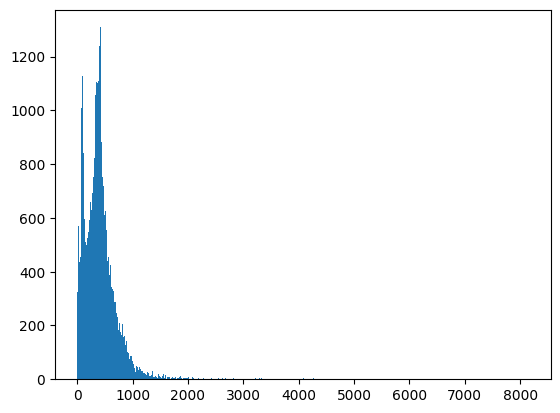

In [30]:
#Plotting the lengths of the sequences in X
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [31]:
#Storing the length of the sequences
nos = np.array([len(x) for x in X])
len(nos[nos>500])

12510

In [32]:
#Sequences are padded here
maxlen = 500
X = pad_sequences(X,maxlen=maxlen)

In [ ]:
X[0]

array([     0,      0,      0, ...,  16869,      2, 204127], dtype=int32)

In [33]:
vocab_size = len(tokenizer.word_index) + 1

In [34]:
#The function get_weight_matrix is defined where a weight matrix of size (vocab_size, DIM) is created, where 'vocab_size' is the length of the word index obtained from the Tokenizer and 'DIM' is set to 100.
DIM = 100
vocab = tokenizer.word_index
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word]
    
    return weight_matrix

In [35]:
embedding_vectors = get_weight_matrix(w2v_model)

In [36]:
embedding_vectors.shape

(376114, 100)

LSTM Model


In [ ]:
# Build and train the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1050, 100)         37611400  
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,728,777
Trainable params: 117,377
Non-trainable params: 37,611,400
_________________________________________________________________


In [49]:
#Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
737/737 [==============================] - 1751s 2s/step - loss: 0.1012 - accuracy: 0.9672 - val_loss: 0.0443 - val_accuracy: 0.9861
Epoch 2/10
737/737 [==============================] - 1756s 2s/step - loss: 0.0491 - accuracy: 0.9836 - val_loss: 0.0357 - val_accuracy: 0.9899
Epoch 3/10
737/737 [==============================] - 1756s 2s/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0564 - val_accuracy: 0.9856
Epoch 4/10
737/737 [==============================] - 1768s 2s/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 0.0355 - val_accuracy: 0.9921
Epoch 5/10
737/737 [==============================] - 1778s 2s/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0419 - val_accuracy: 0.9913
Epoch 6/10
737/737 [==============================] - 1709s 2s/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0429 - val_accuracy: 0.9903
Epoch 7/10
737/737 [==============================] - 1702s 2s/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0635 - val_accuracy:

In [51]:
#Predicting the binary labels for the test data using the trained model
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 3s 9ms/step


In [54]:
#Accuracy score
accuracy_score(y_test, y_pred)

0.9938331848552338


In [53]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5828
           1       0.99      0.99      0.99      5397

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
#Testing the model
x = ['Govt making efforts to obtain files relating to Netaji: MoS Muraleedharan in Rajya Sabha']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=1050)
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 26ms/step


array([[0]])

In [ ]:
#Testing the model
x=['''The Minister said in the Rajya Sabha that the UK has informed that 62 files on Bose are already available on the websites of the National Archives and the British Library.MoS Muraleedharan was replying to a question on the governments efforts to seek cooperation relating to the controversy over Netaji's death.
The Russian Government had informed the government of India that they were unable to find any documents in the Russian archives pertaining to Netaji. "The Russian government said that additional investigations were made to find the documents, based on request from the Indian side," he said.
ALSO READ: PM Modi unveils hologram statue of Netaji Subhas Chandra Bose at India Gate
The Japanese government has declassified two files on Netaji. "These files are part of their Archives and are available in the public domain. The government of Japan has transferred these files to India and they are retained in the National Archives of India," the minister said.
Muraleedharan informed the government of Japan has also said that if there are any additional documents relevant to the matter, those would be declassified as per their policies after a prescribed time period and based on an internal review mechanism.''']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x,maxlen=1050)
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 39ms/step


array([[1]])

In [ ]:
#Saving our model
from keras.models import load_model
model.save('lstm_Model.h5') 
model_lstm = load_model('lstm_Model.h5')